In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
df = pd.read_csv('./ex2data1.txt', encoding='utf-8', header=None)
df.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
df.loc[df[2] == 0, [0, 1]][0].values

array([34.62365962, 30.28671077, 35.84740877, 45.08327748, 95.86155507,
       75.01365839, 39.53833914, 67.94685548, 67.37202755, 50.53478829,
       34.21206098, 93.1143888 , 61.83020602, 38.7858038 , 52.10797973,
       40.23689374, 54.63510555, 33.91550011, 74.78925296, 34.18364003,
       51.54772027, 82.36875376, 51.04775177, 62.22267576, 34.52451385,
       50.28649612, 49.58667722, 32.57720017, 35.28611282, 56.2538175 ,
       30.05882245, 44.66826172, 66.56089447, 49.07256322, 32.72283304,
       60.45555629, 82.22666158, 42.07545454, 52.34800399, 55.48216114])

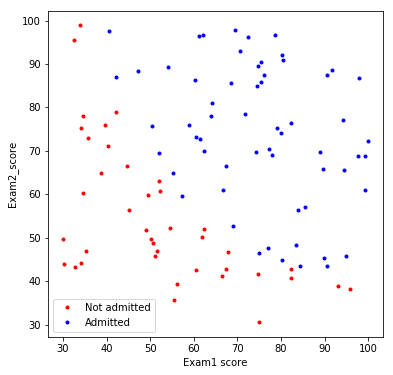

In [4]:
plt.figure(figsize=(6, 6))
plt.plot(df.loc[df[2] == 0, [0, 1]][0].values, df.loc[df[2] == 0, [0, 1]][1], '.r', label = 'Not admitted')
plt.plot(df.loc[df[2] == 1, [0, 1]][0], df.loc[df[2] == 1, [0, 1]][1], '.b', label='Admitted')
plt.legend()
plt.xlabel('Exam1 score')
plt.ylabel('Exam2_score')
plt.show()

# Logistic Regression
### Sigmoid function:    
$ g(z) = \frac{1}{1 + {e}^{-z}} $

$\frac{\partial{g(z)}}{\partial{z}} = \frac{e^{-z}}{(1 + e^{-z})^2} = \frac{e^{-z}}{(1 + e^{-z})} \frac{1}{(1 + e^{-z})} 
= \frac{(1 + e^{-z}) -1}{(1 + e^{-z})} \frac{1}{(1 + e^{-z})} = (1 - g(z))g(z) $
### Hypothesis Function (Linear Hypothesis equation assumption: ${\Theta}^TX$ ):
 $h_{\Theta}(X)$ = $g({\Theta}^TX)$  
 
0 ${\leq}$ $h_{\Theta}(X)$ ${\leq}$1 
### Cost Function (Binary Entropy):  
$ J_{\Theta} = -ylog(h_{\Theta}(X)) -(1-y)log(1-h_{\Theta}(X))$

### Gradient Desciend: (Result would be different with the derivative of hypothesis function) 
$ \frac{\partial{J_{\Theta}}}{\partial{\Theta}} = -\frac{y}{h_{\Theta}(X)} \frac{\partial{h_{\Theta}(X)}}{\partial{\Theta}} -\frac{(1-y)}{(1 - h_{\Theta}(X))} \frac{\partial{(1-h_{\Theta}(X))}}{\partial{\Theta}}  
= -\frac{y}{g({\Theta^T}X)} \frac{\partial{g({\Theta^T}X})}{\partial{\Theta}} -\frac{(1-y)}{(1 - g({\Theta^T}X))} \frac{\partial{(1-g({\Theta^T}X))}}{\partial{\Theta}} $

$=-\frac{y}{g({\Theta^T}X)}(1- g({\Theta^T}X)g({\Theta^T}X) -\frac{(1-y)}{(1 - g({\Theta^T}X))}(1- g({\Theta^T}X)(-)g({\Theta^T}X) $

$= - y (1- g({\Theta^T}X) + (1-y)g({\Theta^T}X)$ 

$= h_{\Theta}(X) -y $

$= g({\Theta^T}X)-y$

$= \frac {1}{(1+e^{-{\Theta}^TX})}-y$

$=\sum^{n}_{j=1} (\frac{\partial J_{\Theta}}{\partial{\Theta_j}}) $
$=\sum^{n}_{j=1} (g({\Theta^T}X)-y)\frac {\partial({\Theta^T}X)}{\partial {\Theta_j}} $
$=\sum^{n}_{j=1} (g({\Theta^T}X)-y)X_j $


=np.dot(X.transport(), $g({\Theta^T}X)-y$) 

=np.dot(X.transport(), $h_{\Theta}(X)-y$) 

=np.dot(X.transport(), $\hat{y}-y$)

### Parameter of hypothesis function update with learning rate ${\alpha}:$

${\Theta}$ += $\frac {1}{number of X} * {\alpha}(\sum^{n}_{j=1}* (g({\Theta^T}X)-y)X_j)$

${\Theta}$ += 1/X.shape[0] * ${\alpha}$ * np.dot(X.transport(), $\hat{y}-y$)

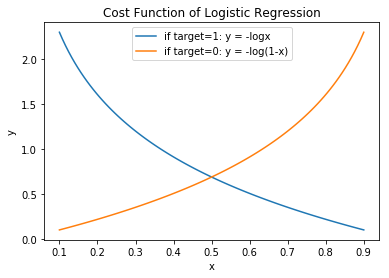

In [5]:
plt.plot(np.linspace(0.1, 0.9, 100), -np.log(np.linspace(0.1, 0.9, 100)), label='if target=1: y = -logx')
plt.plot(np.linspace(0.1, 0.9, 100), -np.log(1 -np.linspace(0.1, 0.9, 100)), label='if target=0: y = -log(1-x)')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cost Function of Logistic Regression');

In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [7]:
def costFunction(X, y, theta):
    return - y * (np.log(sigmoid(np.dot(X, theta)))) - (1 - y) * (np.log(1 - sigmoid(np.dot(X, theta))))

In [9]:
def gradientDescent(X, y , theta, iter_num, alpha_rate):
    theta_list, cost_list = [], []
    for idx in range(iter_num):
        y_hat = sigmoid(np.dot(X, theta))
        cost_list.append(np.mean((-y * (np.log(sigmoid(np.dot(X, theta)))) - (1-y)*(np.log(1 - sigmoid(np.dot(X, theta)))))))
        theta -= (alpha_rate * 1/X.shape[0] * np.dot(X.T, (y_hat - y)))
        theta_list.append(theta)
    return theta_list, cost_list

In [8]:
def featureStandardlized(X, X_mean, X_std):
    if X_std == 0:
        print('std is 0')
    return (X - X_mean) / X_std

In [10]:
df.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [11]:
X1, X1_mean, X1_std = df[0].values.reshape(-1, 1), df[0].mean(), df[0].std()
X2, X2_mean, X2_std = df[1].values.reshape(-1, 1), df[1].mean(), df[1].std()
X_const = np.ones((X1.shape[0], 1))
X1_stand, X2_stand = featureStandardlized(X1, X1_mean, X1_std), featureStandardlized(X2, X2_mean, X2_std)
X_train = np.concatenate((X1_stand, X2_stand), axis=1)
X_train = np.concatenate((X_const, X_train), axis=1)
y_train = df[2].values.reshape(-1, 1)
theta_train = np.zeros((3, 1))


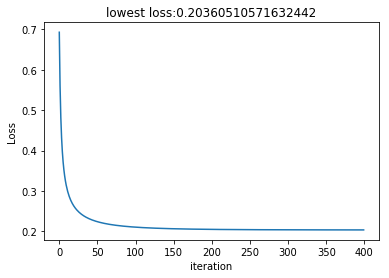

In [12]:
# Gradient Descent
coeff_result, cost_result = gradientDescent(X_train, y_train, theta_train, 400, 1)
plt.plot(range(len(cost_result)), cost_result)
plt.title('lowest loss:{}'.format(str(min(cost_result))))
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.show();


In [14]:
def predict(X, theta_):
    
    return 1 if sigmoid(np.dot(X, theta_))>=0.5 else 0

In [15]:
def descisionBoundary(X,Y, theta_):
    boundary_x, boundary_y = [], []
    for i in X:
        for j in Y:
            if abs(sigmoid(theta_[0] + theta_[1] * i + theta_[2] * j) - 0.5) < 0.01:
                boundary_x.append(i)
                boundary_y.append(j)
    return np.array(boundary_x), np.array(boundary_y)

In [16]:
def unStandardlized(X, X_mean_u, X_std_u):
    return (X * X_std_u) + X_mean_u

In [18]:
grid = np.linspace(30, 100, 101).reshape(-1, 1)
bx, by = descisionBoundary(featureStandardlized(grid, X1_mean, X1_std), 
                           featureStandardlized(grid, X2_mean, X2_std) ,coeff_result[-1])
bx, by = unStandardlized(bx, X1_mean, X1_std), unStandardlized(by, X2_mean, X2_std)

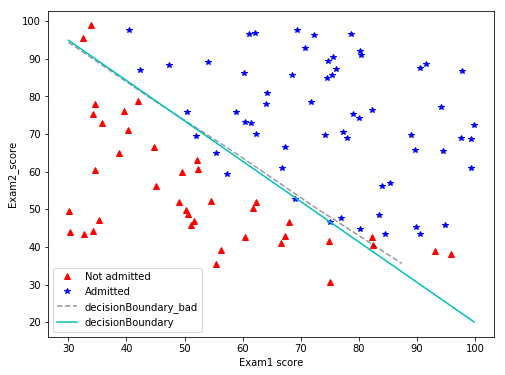

In [20]:
plt.figure(figsize=(8, 6))
plt.plot(df.loc[df[2] == 0, [0, 1]][0].values, df.loc[df[2] == 0, [0, 1]][1], '^r', label = 'Not admitted')
plt.plot(df.loc[df[2] == 1, [0, 1]][0], df.loc[df[2] == 1, [0, 1]][1], '*b', label='Admitted')
plt.plot(bx, by, '--k', label='decisionBoundary_bad', alpha=0.4)
grid_for_boundary = np.linspace(X1.min(), X1.max(), 100)

plt.plot(grid_for_boundary, 
         unStandardlized(-(coeff_result[-1][0] + coeff_result[-1][1] * \
                         featureStandardlized(grid_for_boundary, X1_mean, X1_std))/coeff_result[-1][2], 
                         X1_mean, X1_std), 'c', label='decisionBoundary')
plt.legend(loc=0)
plt.xlabel('Exam1 score')
plt.ylabel('Exam2_score')
plt.show()